In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResult.csv"
playerNr = 62

idxLength = 28
idxGain = 29

In [3]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

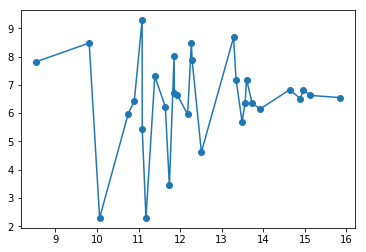

[1.       7.812135 8.476882 2.291579 5.977848 6.422126 9.283238 5.433483
 2.291579 7.301361 6.226645 3.438258 8.008179 6.713475 6.648108 5.952728
 8.478193 7.884895 4.619041 8.676883 7.178197 5.689724 6.364399 7.175842
 6.345755 6.146193 6.825421 6.513733 6.820879 6.624786 6.547279]
[-1.        8.528961  9.813586 10.06478  10.75292  10.89837  11.08702
 11.09007  11.17939  11.39198  11.64567  11.74277  11.85616  11.86274
 11.93118  12.18185  12.27218  12.28926  12.51271  13.28679  13.34733
 13.49173  13.56442  13.60075  13.73448  13.92594  14.63708  14.89173
 14.96617  15.13053  15.85158 ]
Optimal lenght:  6.6664196


In [11]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 5 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-5:]) / 5
print("Optimal lenght: ", avg)